## Predhodno smo narerdili regresijo

* preverimo, ča lahko z novimi podatki, natančneje napovemo Energetsko izkaznico

In [65]:
import pandas as pd
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = df.drop_duplicates()
df_reg = pd.read_csv("/content/sample_data/ER_podatki_napovedana_CE.csv")
df.describe()

,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe
count,5.362800e+04,53628.000000,53628.000000,53616.000000,51580.000000,5.157900e+04,1.726000e+03,2.180100e+04,5.328200e+04,5.330200e+04,53313.000000
mean,1.604654e+07,1537.477325,1237.777430,19.900123,104.775772,2.197961e+04,5.191073e+05,2.609934e+04,5.272743e+04,1.224934e+04,318.287622
std,8.604752e+06,704.922022,1499.701586,62.607765,92.782485,1.083888e+05,3.218912e+06,8.656486e+05,1.391297e+06,3.045606e+05,1367.563206
min,1.012029e+06,1.000000,1.000000,0.000000,-0.020000,-3.010000e+02,-8.105500e+04,-1.665670e+05,-1.859533e+05,-6.972100e+04,1.000000
25%,9.032032e+06,884.000000,271.000000,0.000000,45.827500,2.770000e+02,5.285500e+04,1.000000e+00,4.096250e+02,7.400000e+01,54.000000
50%,1.609203e+07,1727.000000,713.000000,1.000000,76.565000,6.336000e+03,1.487960e+05,1.000000e+00,8.038300e+03,1.696000e+03,83.000000
75%,2.310203e+07,2029.000000,1566.000000,10.000000,135.655000,1.995850e+04,3.731820e+05,2.362000e+01,2.135730e+04,4.547000e+03,171.000000
max,3.112203e+07,2715.000000,10777.000000,1967.000000,3139.320000,1.568572e+07,1.251698e+08,1.227335e+08,3.092701e+08,6.585275e+07,76292.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53628 entries, 0 to 58308
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID energetske izkaznice                53628 non-null  object 
 1   Datum izdelave                         53628 non-null  object 
 2   Velja do                               53628 non-null  int64  
 3   Šifra KO                               53628 non-null  int64  
 4   Številka stavbe                        53628 non-null  int64  
 5   Številka dela stavbe                   53616 non-null  float64
 6   Tip izkaznice                          53628 non-null  object 
 7   Potrebna toplota za ogrevanje          51580 non-null  float64
 8   Dovedena energija za delovanje stavbe  51579 non-null  float64
 9   Celotna energija                       1726 non-null   float64
 10  Dovedena električna energija           21801 non-null  float64
 11  Primarn

* Še nekaj vizualizacij

<Axes: xlabel='Energijsi razred', ylabel='število zapisov'>

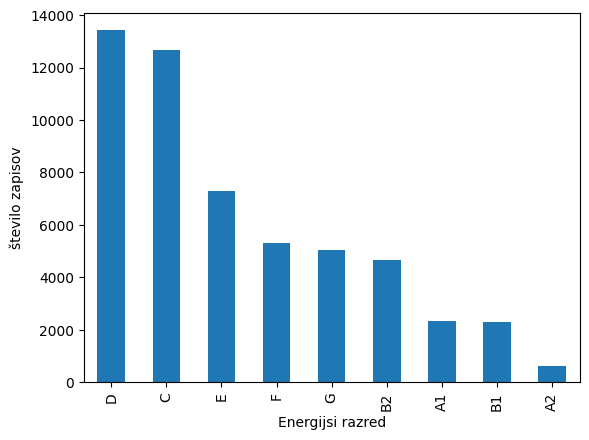

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
df["Energijski razred"].dropna().value_counts().plot(kind="bar", xlabel="Energijsi razred", ylabel="število zapisov")

<Axes: xlabel='Energijsi razred', ylabel='število zapisov'>

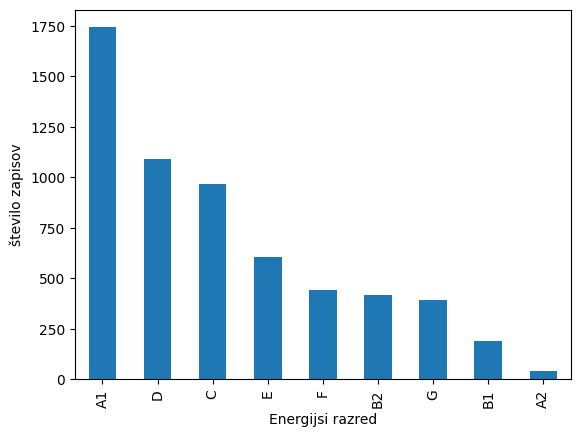

In [68]:
# Primerjava z našim setom
df_reg["Energijski razred"].dropna().value_counts().plot(kind="bar", xlabel="Energijsi razred", ylabel="število zapisov")

Porazdelitev je podobno kot original -> vrednosti niso enake (verjetno bo najboljši gradBoost ali RF)

In [69]:
df_reg.drop(columns=["Unnamed: 0"], inplace=True)
df_reg.isna().sum()

,0
ID energetske izkaznice,0
Datum izdelave,0
Velja do,0
Šifra KO,0
Številka stavbe,0
Številka dela stavbe,0
Tip izkaznice,0
Potrebna toplota za ogrevanje,1726
Dovedena energija za delovanje stavbe,1726
Celotna energija,0


In [70]:
df_reg = df_reg.dropna()
df_reg

,ID energetske izkaznice,Datum izdelave,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Tip izkaznice,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe,Energijski razred,EPBD
90,2023-806-343-102160,05.01.2023,5012033,665,1126,6.0,računska,27.65,3616.0,176290.004658,130.13,5338.2,1102.0,46.0,B2,STANOVANJE
91,2023-806-343-102182,07.01.2023,7012033,1079,997,0.0,računska,40.50,20406.0,180032.136755,188.99,7498.9,1531.0,129.0,C,HISA
92,2023-605-316-102184,08.01.2023,8012033,779,184,1.0,računska,18.93,2099.0,176515.193844,0.00,5247.9,1113.0,54.0,B1,STANOVANJE
93,2023-605-316-102166,05.01.2023,5012033,678,1261,0.0,računska,160.00,33851.0,179172.542635,105.17,4702.2,291.0,118.0,F,HISA
94,2023-629-150-102163,05.01.2023,5012033,949,423,0.0,računska,103.95,39652.0,182268.436935,1404.00,40590.0,9448.0,109.0,D,HISA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5316,2022-735-58-101195,16.11.2022,16112032,1832,848,0.0,računska,52.61,13283.0,180341.494207,0.00,4995.8,1059.0,143.0,C,HISA
5317,2022-693-80-101196,16.11.2022,16112032,1077,3250,279.0,računska,46.85,8628.0,179143.124053,153.79,10267.3,1909.0,107.0,C,STANOVANJE
5318,2022-789-337-101209,16.11.2022,16112032,2035,577,4.0,računska,25.13,1292.0,174847.096343,7.66,2171.9,443.0,19.0,B2,PISARNE
5319,2022-605-316-101208,16.11.2022,16112032,1783,1365,2.0,računska,67.12,3999.0,175569.617105,28.06,5112.8,1195.0,31.0,D,STANOVANJE


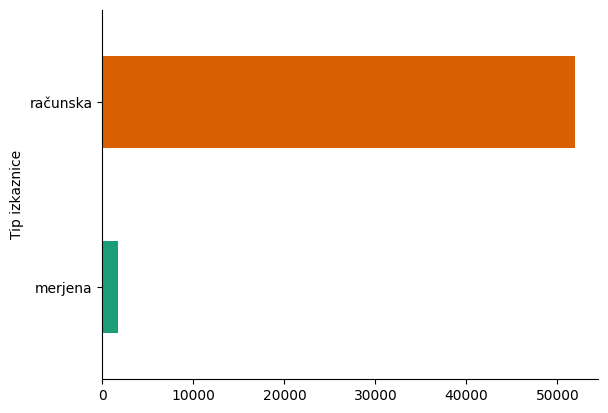

In [71]:
df.groupby('Tip izkaznice').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

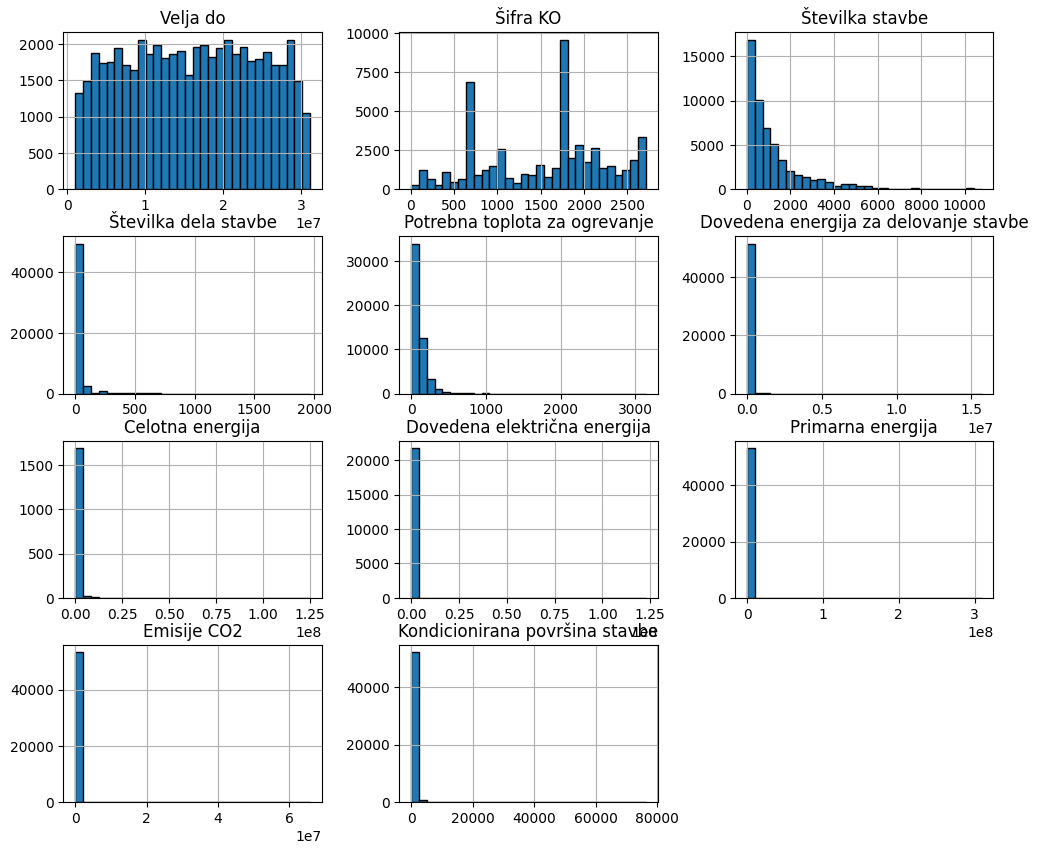

In [72]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black");

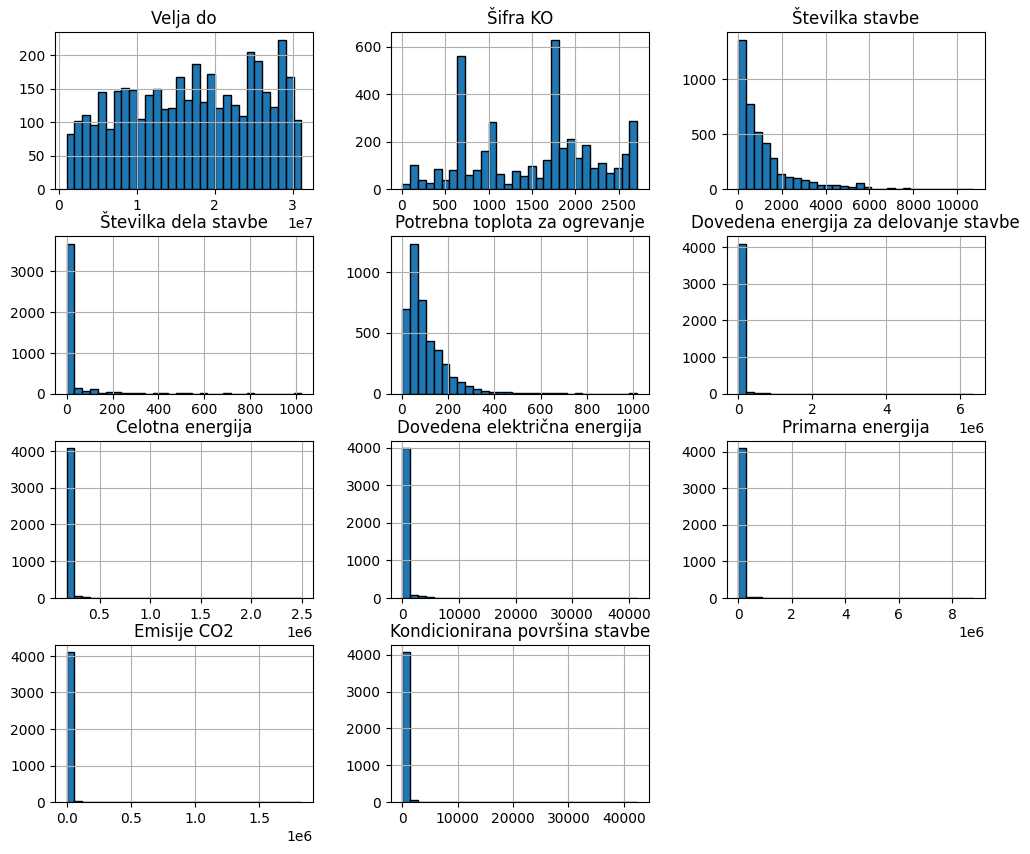

In [73]:
df_reg.hist(figsize=(12, 10), bins=30, edgecolor="black");

In [74]:
df

,ID energetske izkaznice,Datum izdelave,Velja do,Šifra KO,Številka stavbe,Številka dela stavbe,Tip izkaznice,Potrebna toplota za ogrevanje,Dovedena energija za delovanje stavbe,Celotna energija,Dovedena električna energija,Primarna energija,Emisije CO2,Kondicionirana površina stavbe,Energijski razred,EPBD
0,2025-806-343-120723,17.02.2025,17022035,659,64,14.0,računska,33.00,155.0,NaN,1.0,189.00,37.0,81.0,B2,STANOVANJE
1,2025-808-65-119802,14.02.2025,14022035,2631,2293,0.0,merjena,NaN,NaN,472179.28,162452.0,584378.01,87937.0,2566.0,A1,DRUGO
2,2025-789-337-121007,26.02.2025,26022035,1697,1748,0.0,računska,247.00,354.0,NaN,1.0,481.50,111.0,40.0,G,HISA
3,2025-766-63-121323,09.03.2025,9032035,2315,2295,1.0,računska,98.00,235.0,NaN,1.0,331.80,75.0,84.0,D,HISA
4,2025-796-237-121868,23.03.2025,23032035,533,260,1.0,računska,13.00,40.0,NaN,1.0,74.70,10.0,828.0,A2,PISARNE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58304,2024-827-121-114489,22.06.2024,22062034,1447,869,0.0,računska,153.39,257.0,NaN,1.0,100.10,18.0,142.0,F,HISA
58305,2024-927-316-114499,23.06.2024,23062034,1331,895,0.0,računska,230.99,281.0,NaN,1.0,353.10,86.0,146.0,G,HISA
58306,2024-927-316-114523,25.06.2024,25062034,1075,820,0.0,računska,88.68,196.0,NaN,1.0,231.00,58.0,65.0,D,HISA
58307,2024-897-8-114350,27.06.2024,27062034,2108,50,0.0,računska,87.59,123.0,NaN,1.0,172.90,36.0,296.0,D,HISA


In [75]:
df.isna().sum()

,0
ID energetske izkaznice,0
Datum izdelave,0
Velja do,0
Šifra KO,0
Številka stavbe,0
Številka dela stavbe,12
Tip izkaznice,0
Potrebna toplota za ogrevanje,2048
Dovedena energija za delovanje stavbe,2049
Celotna energija,51902


In [76]:
## Uredimo podatke
def urediZaKlasifikacijo(v_df):
  v_df.dropna(subset=["Primarna energija", "Emisije CO2", "Potrebna toplota za ogrevanje", "Dovedena energija za delovanje stavbe", "Kondicionirana površina stavbe", "Dovedena električna energija"], inplace=True)
  v_df.drop(columns=["Tip izkaznice", "ID energetske izkaznice", "Velja do", "Šifra KO", "Številka stavbe", "Številka dela stavbe", "Dovedena energija za delovanje stavbe"], inplace=True)
  v_df.drop(columns=["Datum izdelave"], inplace=True)

  v_df["Energijski razred"] = v_df["Energijski razred"].astype("category").cat.codes
  v_df["EPBD "] = v_df["EPBD "].astype("category").cat.codes
  target = v_df["Energijski razred"]
  v_df.drop(columns=["Energijski razred"], inplace=True)
  v_df = (v_df - v_df.min()) / (v_df.max() - v_df.min())
  v_df = v_df.fillna(0)

  return v_df, target

In [77]:
## Uredimo podatke
def urediZaVizualizacijo(v_df):
  v_df.dropna(subset=["Primarna energija", "Emisije CO2", "Potrebna toplota za ogrevanje", "Dovedena energija za delovanje stavbe", "Kondicionirana površina stavbe", "Dovedena električna energija"], inplace=True)
  v_df.drop(columns=["Tip izkaznice", "ID energetske izkaznice", "Velja do", "Šifra KO", "Številka stavbe", "Številka dela stavbe", "Dovedena energija za delovanje stavbe"], inplace=True)
  v_df.drop(columns=["Datum izdelave"], inplace=True)

  v_df["Energijski razred"] =v_df["Energijski razred"].astype("category").cat.codes
  v_df["EPBD "] = v_df["EPBD "].astype("category").cat.codes
  v_df = v_df.fillna(0)

  return v_df

In [78]:
X, y = urediZaKlasifikacijo(df)

In [79]:
X_reg, y_reg = urediZaKlasifikacijo(df_reg)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [83]:
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = df.drop_duplicates()
df_reg = pd.read_csv("/content/sample_data/ER_podatki_napovedana_CE.csv")
df_reg.drop(columns=["Unnamed: 0"], inplace=True)
df_reg = df_reg.dropna()

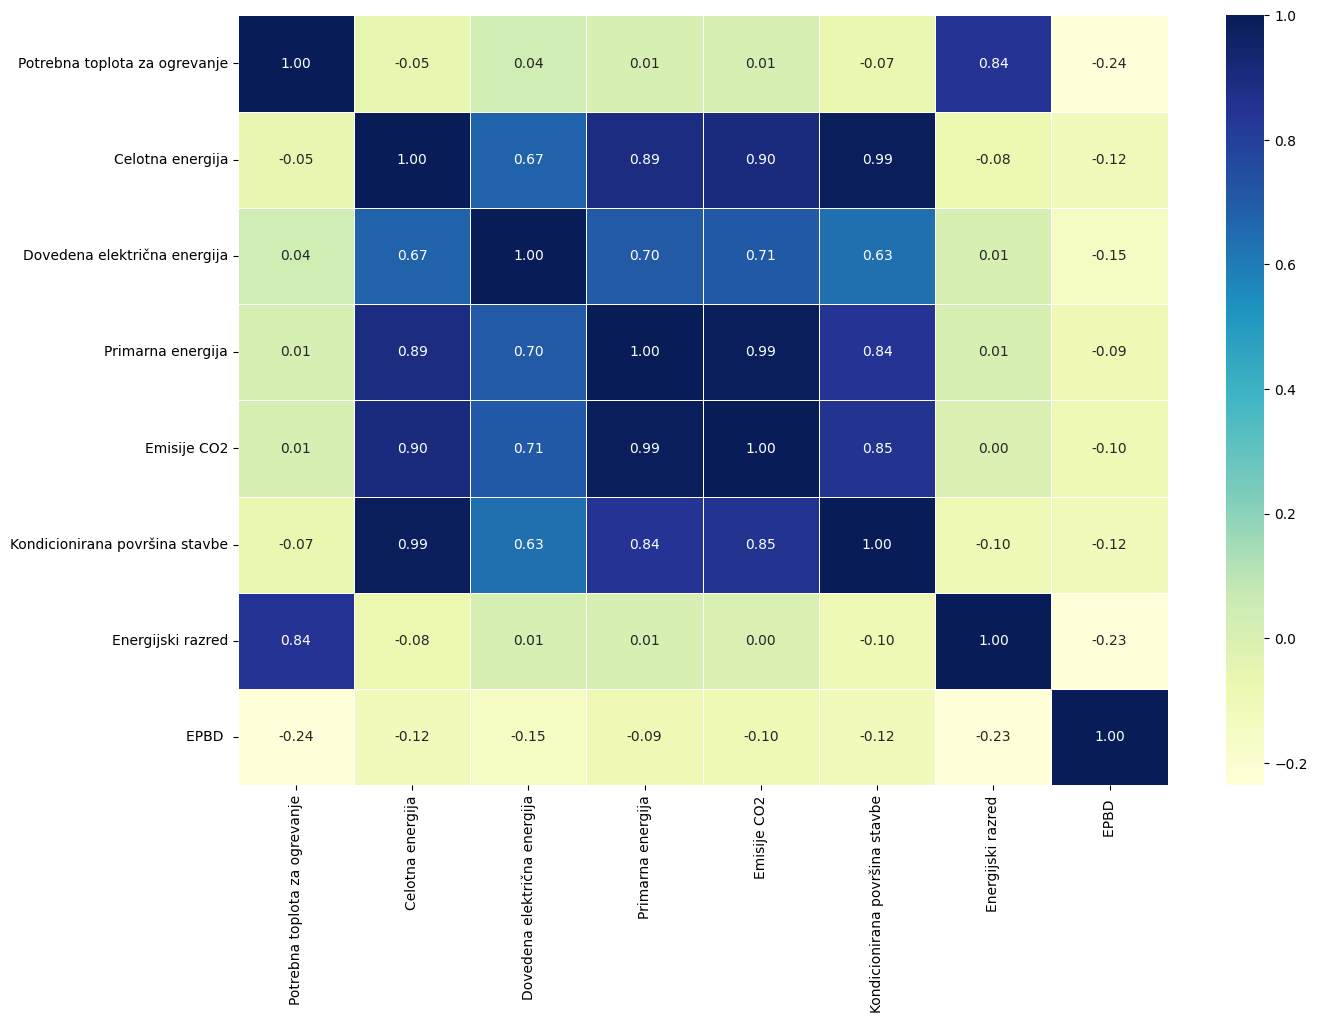

In [84]:
# Lets make our correlation matrix
df_reg = urediZaVizualizacijo(df_reg)
corr_matrix = df_reg.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

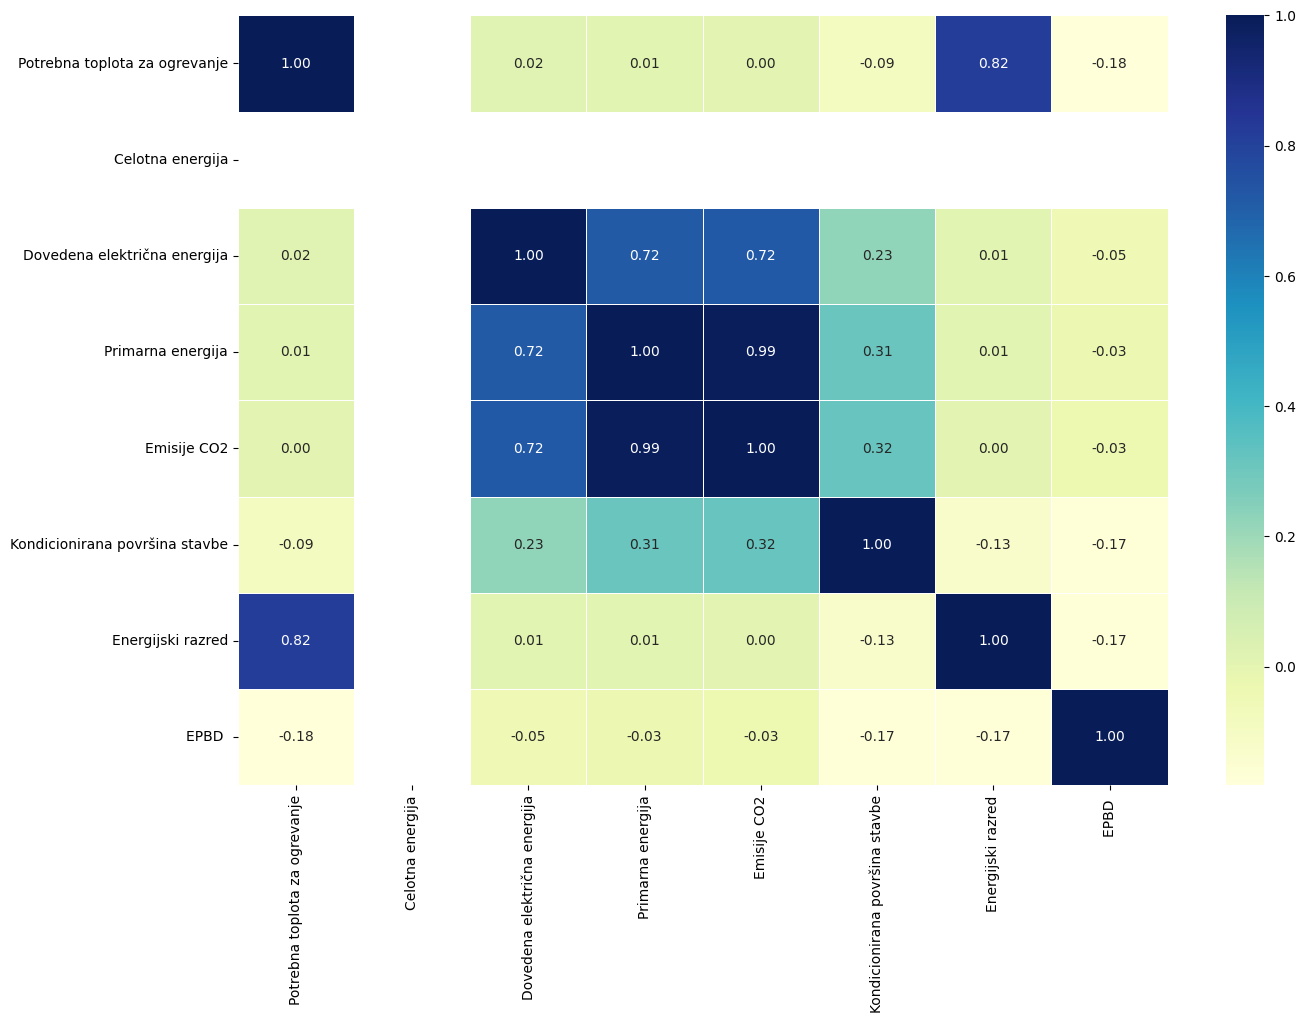

In [85]:
df = urediZaVizualizacijo(df)
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
# Poizkusimo različne modele in poglejmo feature importance
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given ML models.
    Models : a dict of different sklearn models
    """
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [89]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores

{'Logistic Regression': 0.5170350673092904,
 'KNN': 0.9665946484959282,
 'Random Forest': 0.9968422802060828}

In [90]:
# Poglejmo, če smo kaj izboljšali s celo energijo
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
scores

{'Logistic Regression': 0.6388443017656501,
 'KNN': 0.949438202247191,
 'Random Forest': 0.9887640449438202}

**V bistvu imamo slabši rezultat, but hej, vsaj `celotno energijo` imamo. Nadaljujemo z RF in iskanje najboljših atributov ter hiperparametrov.**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9968422802060828

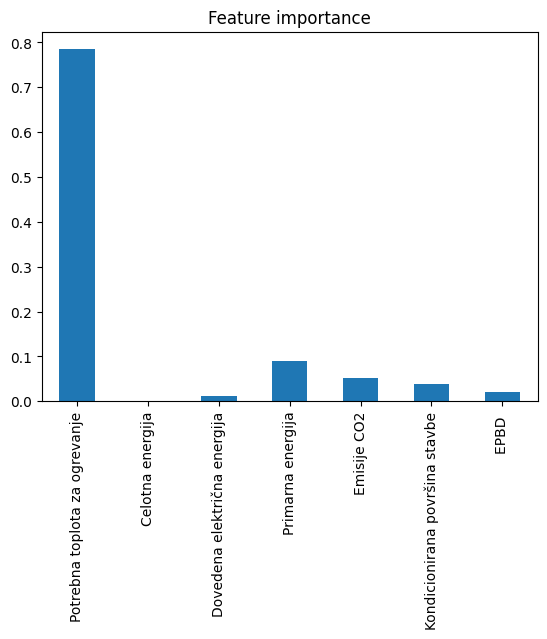

In [92]:
feature_dict = dict(zip(X.columns, list(clf.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [93]:
# Z vsakim treniranjem bomo odstranili 1 fetaure -> dokler nimamo samo 3
X.drop(columns=["Celotna energija"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.998504237992355

In [94]:
X.drop(columns=["Dovedena električna energija"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9991690211068639

In [95]:
X.drop(columns=["EPBD "], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9996676084427456

In [96]:
X.drop(columns=["Kondicionirana površina stavbe"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9978394548778461

**Najboljši score torej, ko smo odstranili 3 features**

In [102]:
df = pd.read_csv(
    "/content/sample_data/ei_javni_register_mar25.csv",
    sep="|",
    decimal=",",
    thousands=".",
    encoding="utf8",
    dtype={"Datum izdelave": str}
)
df = df.drop_duplicates()

In [103]:
X, y = urediZaKlasifikacijo(df)
X.drop(columns=["Celotna energija", "Dovedena električna energija", "EPBD "], inplace=True)

In [107]:
rf_grid = {"n_estimators": np.arange(10, 300, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rs_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=50,
                           verbose=True,
                           random_state=42)

rs_rf.fit(X_train, y_train)
rs_rf.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': np.int64(160),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(1),
 'max_depth': None}

In [110]:
clf = RandomForestClassifier(random_state=42,
                             n_estimators=160,
                             min_samples_split=14,
                             min_samples_leaf=1,
                             max_depth=None)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9966760844274556

In [113]:
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[  24,   11,    2,    0,    0,    0,    0,    0,    0],
       [   1,   84,    4,    1,    0,    0,    0,    0,    0],
       [   0,    0,  323,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,  581,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1378,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1520,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  842,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  669,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  576]])

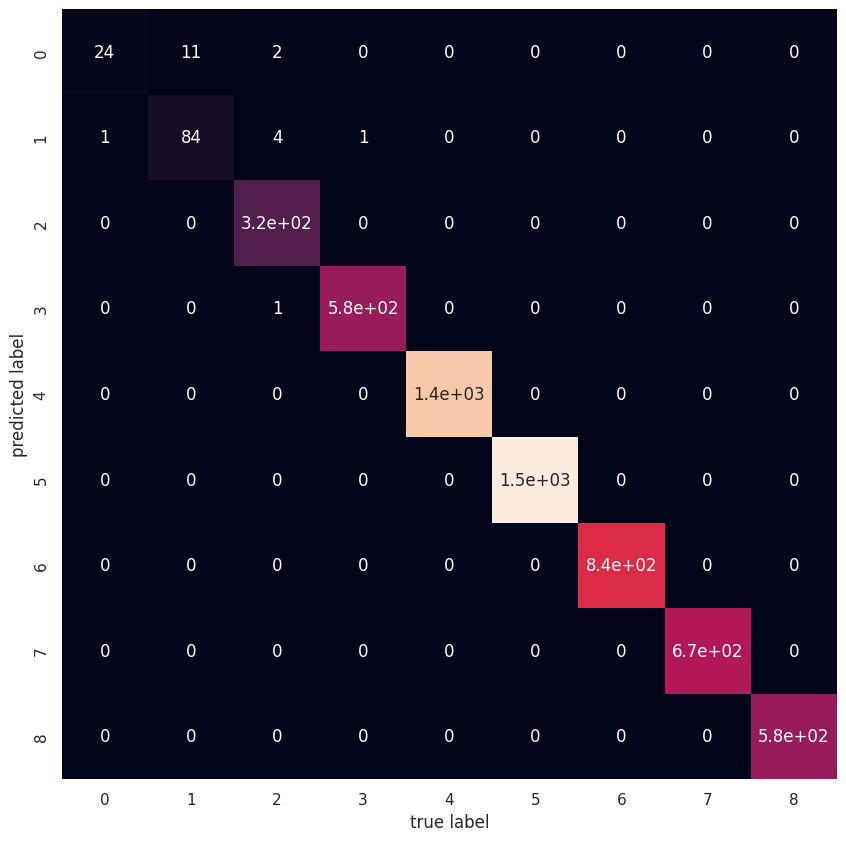

In [118]:
sns.set(font_scale=1)
def plot_conf_mat(y_test, y_preds):
    """
    Ploting confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
plot_conf_mat(y_test, y_preds);

In [122]:
# Shranimo model
import pickle
filename = '/content/sample_data/RFEnergetskaIzkaznica.pkl'
pickle.dump(clf, open(filename, 'wb'))